DOWNLOAD 
libs_beautify_photo.zip form dropbox

In [ ]:
!wget "https://www.dropbox.com/s/2yrzr98wj1faxi3/libs_beautify_photo.zip"
!unzip "/content/libs_beautify_photo.zip" && rm "/content/libs_beautify_photo.zip"
!rm -r "/content/__MACOSX"


--2022-09-04 04:59:01--  https://www.dropbox.com/s/2yrzr98wj1faxi3/libs_beautify_photo.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2yrzr98wj1faxi3/libs_beautify_photo.zip [following]
--2022-09-04 04:59:02--  https://www.dropbox.com/s/raw/2yrzr98wj1faxi3/libs_beautify_photo.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8b7dac566d576c66b87593f209.dl.dropboxusercontent.com/cd/0/inline/BsSeEZvAyboSF5u-V-Nv1dCr1L5RdKDiuT3ECRBlw2OY9YbRpEBDYnZvl3qwfi297lRGgGgKaQOObhrlZJPAWTgd_TON5eB2hyEYq0Co6-H7ZJ9kCWTJDCN8fZ9XDBl8ytn0xfMIcL2FUytYWTKNKZubyOQA0YoyM-rdZ-vnkt-LVA/file# [following]
--2022-09-04 04:59:02--  https://uc8b7dac566d576c66b87593f209.dl.dropboxusercontent.com/cd/0/inline/BsSeEZvAyboSF5u-V-Nv1dCr1L5RdKDiuT3ECRBlw2OY9Y

Install pre-requisites

In [ ]:
!pip install -r /content/colab_requirements.txt

!pip install basicsr==1.3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 214 kB 27.2 MB/s 
     |████████████████████████████████| 129 kB 63.5 MB/s 
     |████████████████████████████████| 1.9 MB 50.6 MB/s 
     |████████████████████████████████| 15.3 MB 50.9 MB/s 
     |████████████████████████████████| 172 kB 69.2 MB/s 
     |████████████████████████████████| 59 kB 4.3 MB/s 
     |████████████████████████████████| 5.9 MB 54.9 MB/s 
     |████████████████████████████████| 190 kB 65.1 MB/s 
     |████████████████████████████████| 78 kB 7.5 MB/s 
     |████████████████████████████████| 355 kB 62.8 MB/s 
     |████████████████████████████████| 177 kB 70.1 MB/s 
     |████████████████████████████████| 47 kB 4.3 MB/s 
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214839 sha256=20586b654c1d9e0432d010a85a1284f4445919e5ae3aae80c56fbc07a8623402
  Stored in directory: /root/.cache/pip/wheels/2c/b3/4a/e

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 161 kB 32.4 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.5-py3-none-any.whl size=194484 sha256=6a7cc3edcd1869c903fb53c760e048c4318b6c6fde2acc45901cafdde9307aac
  Stored in directory: /root/.cache/pip/wheels/74/1b/d0/8659cf028233dd1e3bf282271009fbf037dfc4ab761f32a032
Successfully built basicsr
  Attempting uninstall: basicsr
    Found existing installation: basicsr 1.4.2
    Uninstalling basicsr-1.4.2:
      Successfully uninstalled basicsr-1.4.2


Import required libraries 
sys, os, pytorch, fastai, deoldify, gfpgan

In [ ]:
import sys
import os

sys.path.append('/content/libs/GFPGAN')
sys.path.append('/content/libs/DeOldify')

In [ ]:
import torch
import fastai
from deoldify import device
from deoldify.visualize import *
from deoldify.device_id import DeviceId
from pathlib import Path

In [ ]:
!mkdir '/content/input' 
!mkdir '/content/high_resolution_output' 
!mkdir '/content/final_colorized_output'
!mkdir '/content/final_colorized_output/from_original' 
!mkdir '/content/final_colorized_output/from_recontraction'

Upload and Image for restoration as well as colorization

In [ ]:
!cd /content/libs/GFPGAN && python setup.py develop
!cd /content/libs/GFPGAN && python inference_gfpgan.py -i ../../input -o ../../high_resolution_output -v 1.3 -s 2

running develop
running egg_info
creating gfpgan.egg-info
writing gfpgan.egg-info/PKG-INFO
writing dependency_links to gfpgan.egg-info/dependency_links.txt
writing requirements to gfpgan.egg-info/requires.txt
writing top-level names to gfpgan.egg-info/top_level.txt
writing manifest file 'gfpgan.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'gfpgan.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/gfpgan.egg-link (link to .)
Adding gfpgan 1.3.2 to easy-install.pth file

Installed /content/libs/GFPGAN
Processing dependencies for gfpgan==1.3.2
Searching for yapf==0.32.0
Best match: yapf 0.32.0
Adding yapf 0.32.0 to easy-install.pth file
Installing yapf script to /usr/local/bin
Installing yapf-diff script to /usr/local/bin

Using /usr/local/lib/python3.7/dist-packages
Searching for tb-nightly==2.11.0a20220903
Best match: tb-nightly 2.11.0a20220903
Adding tb-nightly 2.11.0a20220903 to e

# Colorize images

In [ ]:
device.set(device=DeviceId.GPU0)
if not torch.cuda.is_available():
    print('GPU not available.')
torch.backends.cudnn.benchmark = True

GPU not available.


In [ ]:
colorizer = get_image_colorizer(artistic=False)

/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential s

  0%|          | 0.00/171M [00:00<?, ?B/s]

In [ ]:
input = "Both" #@param ["Original images", "Images after Face Restoration", "Both"]
# result_dir_path = '/content/result_images' #@param {type:"string"}
render_factor = 17  #@param {type: "slider", min: 7, max: 40}
# watermarked = False #@param {type:"boolean"}
# display_render_factor = False #@param {type:"boolean"}
image_pathes = []
result_pathes = []
if input == "Original images":
  image_pathes.append('/content/input')
  result_pathes.append('/content/final_colorized_output/from_original')
if input == "Images after Face Restoration":
  image_pathes.append('/content/high_resolution_output/restored_imgs')
  result_pathes.append('/content/final_colorized_output/from_recontraction')
if input == "Both":
  image_pathes.append('/content/input')
  result_pathes.append('/content/final_colorized_output/from_original')
  image_pathes.append('/content/high_resolution_output/restored_imgs')
  result_pathes.append('/content/final_colorized_output/from_recontraction')

In [ ]:
def colorize_photo(image_path, result_dir_path, render_factor, watermarked=False, display_render_factor=False):
  colorizer.plot_transformed_image(image_path, results_dir=Path(result_dir_path), render_factor=render_factor, display_render_factor=display_render_factor, figsize=(8,8), watermarked=watermarked)

In [ ]:
import imghdr

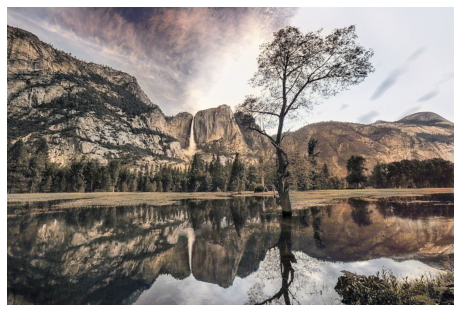

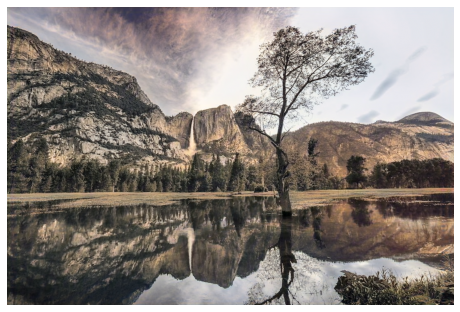

In [ ]:
for i in range(len(image_pathes)):
  # os.mkdir(result_pathes[i])
  for file in os.listdir(image_pathes[i]):
    full_path = image_pathes[i] + "/" + file
    if os.path.isfile(full_path) and imghdr.what(full_path) in ['jpg', 'png', 'jpeg']:
      colorize_photo(full_path, result_pathes[i], render_factor) 

# Ziped result

In [ ]:
!zip -r "colorized_output.zip" "/content/final_colorized_output" 